## Assigment 1

In [54]:
import pandas as pd
import numpy as np
import os
from geopandas import GeoDataFrame
from fiona.crs import from_epsg
import shapely
import matplotlib.pylab as plt
%matplotlib inline

In [55]:
os.getenv('PUIDATA')

'/home/cusp/esg336/PUIdata'

**1.. Find the census trck shape files online (American Fact Finder has them), http://www1.nyc.gov/ has them. The folder you should download is names nycb2010_16d. Load it as a geopandas file**

In [34]:
!curl -O http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nycb2010_16d.zip
os.system("unzip /nycb2010_16d.zip")
os.system("mv nycb2010_16d " + os.getenv("PUIDATA"))

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 5616k  100 5616k    0     0  8424k      0 --:--:-- --:--:-- --:--:-- 9519k


256

In [35]:
shape_path = os.getenv("PUIDATA") + "/nycb2010_16d/nycb2010.shp"
ct_shape = gp.GeoDataFrame.from_file(shape_path)
ct_shape.index=ct_shape.BCTCB2010

In [36]:
shape_path = os.getenv('PUIDATA') + '/nycb2010_16d/nycb2010.shp'
ct_shape = GeoDataFrame.from_file(shape_path)
ct_shape = ct_shape.to_crs(epsg=4326)
ct_shape.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,"POLYGON ((-74.07920577013249 40.643430783779, ..."
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,POLYGON ((-74.07061992438021 40.61085506708748...
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,POLYGON ((-74.07524403910647 40.62600632456045...
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,"POLYGON ((-74.0870879968983 40.61116883127258,..."
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,POLYGON ((-74.07643744511995 40.60100160658919...


**2.. Extract only the Brooklyn shape polygons and convert the coordinates to lat/lon**

In [70]:
ct_shape_bk = ct_shape[ct_shape.BoroName == 'Brooklyn']

In [71]:
#longitude is east-west (i.e. X) and latitude is north-south (i.e. Y)
cusp = shapely.geometry.Point(-73.9866, 40.6931)

In [79]:
for i in ct_shape_bk.index:
    if shapely.geometry.asShape(ct_shape_bk.geometry.loc[i]).contains(cusp):
        cusp_ct = ct_shape_bk.BCTCB2010[i]

In [80]:
ct_shape_bk_reduced = ct_shape_bk[::10]
len(ct_shape_bk)

9682

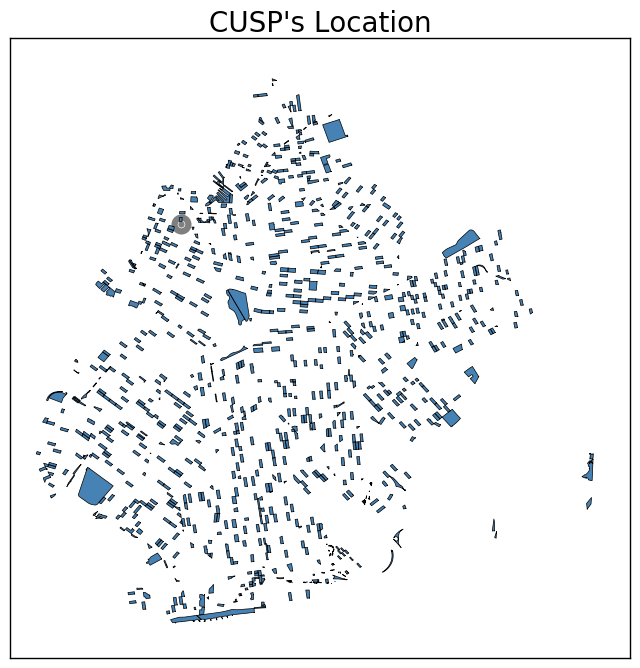

In [88]:
f, ax = plt.subplots(figsize=(8,8))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_xlim(-74.05, -73.82)
ax.set_ylim(40.56, 40.75)
ct_shape_bk_reduced.plot(alpha=1, linewidth=0.5, ax=ax, color='SteelBlue')
pl.scatter(cusp.x, cusp.y, alpha=0.5, color='black', linewidths=10)
ax.set_title("CUSP's Location", fontsize='20')
plt.xlabel('Longitude', fontsize = 15)
plt.ylabel('Latitude', fontsize = 15)

Figure 1: The figure above depicts one-tenth of Brooklyn's census tracts. CUSP is located in tract
%s, which is highlighted in red, and CUSP's coordinates are highlighted by the grey point.